## Luther Kaggle Data

I am working on this data concurrently with troubleshooting my webscraping code.  I will either use this data to enrich the data I pulled or as a substitute whilst still waiting for the code to finsh running.

The first section below will be involving only the main ted data.

In [9]:
import pandas as pd
import numpy as np
import re
import time
from datetime import *

In [76]:
data = pd.read_csv('ted_main.csv')
transcripts = pd.read_csv('transcripts.csv')

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 17 columns):
comments              2550 non-null int64
description           2550 non-null object
duration              2550 non-null int64
event                 2550 non-null object
film_date             2550 non-null int64
languages             2550 non-null int64
main_speaker          2550 non-null object
name                  2550 non-null object
num_speaker           2550 non-null int64
published_date        2550 non-null int64
ratings               2550 non-null object
related_talks         2550 non-null object
speaker_occupation    2544 non-null object
tags                  2550 non-null object
title                 2550 non-null object
url                   2550 non-null object
views                 2550 non-null int64
dtypes: int64(7), object(10)
memory usage: 338.8+ KB


In [78]:
data.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [79]:
def CleanCols(df):
    df.drop('url', axis=1, inplace = True)
    df.drop('description', axis=1, inplace = True)
    df.drop('name', axis=1, inplace = True)
    return df

In [80]:
#Converting unix to datetime
for i,y in zip(data.film_date,data.published_date):
    if type(i) is not datetime:
        new_date = datetime.fromtimestamp(i).date()
        data['film_date'] = new_date
        new_date2 = datetime.fromtimestamp(y).date()
        data['published_date'] = new_date2

In [81]:
#REmoving unnecessary columns
CleanCols(data)

,comments,duration,event,film_date,languages,main_speaker,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,views
0,4553,1164,TED2006,2017-04-23,60,Ken Robinson,1,2017-09-22,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,47227110
1,265,977,TED2006,2017-04-23,43,Al Gore,1,2017-09-22,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,3200520
2,124,1286,TED2006,2017-04-23,26,David Pogue,1,2017-09-22,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,1636292
3,200,1116,TED2006,2017-04-23,35,Majora Carter,1,2017-09-22,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,1697550
4,593,1190,TED2006,2017-04-23,48,Hans Rosling,1,2017-09-22,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,12005869
5,672,1305,TED2006,2017-04-23,36,Tony Robbins,1,2017-09-22,"[{'id': 7, 'name': 'Funny', 'count': 1102}, {'...","[{'id': 229, 'hero': 'https://pe.tedcdn.com/im...",Life coach; expert in leadership psychology,"['business', 'culture', 'entertainment', 'goal...",Why we do what we do,20685401
6,919,992,TED2006,2017-04-23,31,Julia Sweeney,1,2017-09-22,"[{'id': 3, 'name': 'Courageous', 'count': 477}...","[{'id': 22, 'hero': 'https://pe.tedcdn.com/ima...","Actor, comedian, playwright","['Christianity', 'God', 'atheism', 'comedy', '...",Letting go of God,3769987
7,46,1198,TED2006,2017-04-23,19,Joshua Prince-Ramus,1,2017-09-22,"[{'id': 9, 'name': 'Ingenious', 'count': 195},...","[{'id': 750, 'hero': 'https://pe.tedcdn.com/im...",Architect,"['architecture', 'collaboration', 'culture', '...",Behind the design of Seattle's library,967741
8,852,1485,TED2006,2017-04-23,32,Dan Dennett,1,2017-09-22,"[{'id': 3, 'name': 'Courageous', 'count': 562}...","[{'id': 71, 'hero': 'https://pe.tedcdn.com/ima...","Philosopher, cognitive scientist","['God', 'TED Brain Trust', 'atheism', 'brain',...",Let's teach religion -- all religion -- in sch...,2567958
9,900,1262,TED2006,2017-04-23,31,Rick Warren,1,2017-09-22,"[{'id': 21, 'name': 'Unconvincing', 'count': 8...","[{'id': 94, 'hero': 'https://pe.tedcdn.com/ima...","Pastor, author","['Christianity', 'God', 'culture', 'happiness'...",A life of purpose,3095993


In [82]:
data['duration'] = round(data['duration']/60,2)
data

,comments,duration,event,film_date,languages,main_speaker,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,views
0,4553,19.40,TED2006,2017-04-23,60,Ken Robinson,1,2017-09-22,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,47227110
1,265,16.28,TED2006,2017-04-23,43,Al Gore,1,2017-09-22,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,3200520
2,124,21.43,TED2006,2017-04-23,26,David Pogue,1,2017-09-22,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,1636292
3,200,18.60,TED2006,2017-04-23,35,Majora Carter,1,2017-09-22,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,1697550
4,593,19.83,TED2006,2017-04-23,48,Hans Rosling,1,2017-09-22,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,12005869
5,672,21.75,TED2006,2017-04-23,36,Tony Robbins,1,2017-09-22,"[{'id': 7, 'name': 'Funny', 'count': 1102}, {'...","[{'id': 229, 'hero': 'https://pe.tedcdn.com/im...",Life coach; expert in leadership psychology,"['business', 'culture', 'entertainment', 'goal...",Why we do what we do,20685401
6,919,16.53,TED2006,2017-04-23,31,Julia Sweeney,1,2017-09-22,"[{'id': 3, 'name': 'Courageous', 'count': 477}...","[{'id': 22, 'hero': 'https://pe.tedcdn.com/ima...","Actor, comedian, playwright","['Christianity', 'God', 'atheism', 'comedy', '...",Letting go of God,3769987
7,46,19.97,TED2006,2017-04-23,19,Joshua Prince-Ramus,1,2017-09-22,"[{'id': 9, 'name': 'Ingenious', 'count': 195},...","[{'id': 750, 'hero': 'https://pe.tedcdn.com/im...",Architect,"['architecture', 'collaboration', 'culture', '...",Behind the design of Seattle's library,967741
8,852,24.75,TED2006,2017-04-23,32,Dan Dennett,1,2017-09-22,"[{'id': 3, 'name': 'Courageous', 'count': 562}...","[{'id': 71, 'hero': 'https://pe.tedcdn.com/ima...","Philosopher, cognitive scientist","['God', 'TED Brain Trust', 'atheism', 'brain',...",Let's teach religion -- all religion -- in sch...,2567958
9,900,21.03,TED2006,2017-04-23,31,Rick Warren,1,2017-09-22,"[{'id': 21, 'name': 'Unconvincing', 'count': 8...","[{'id': 94, 'hero': 'https://pe.tedcdn.com/ima...","Pastor, author","['Christianity', 'God', 'culture', 'happiness'...",A life of purpose,3095993


## Preliminary Plots 

Makign some preliminary plots to get a better idea of what the data shows and to help decide what factors will be incorporated in the linear regression.


In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

TypeError: float() argument must be a string or a number, not 'datetime.date'

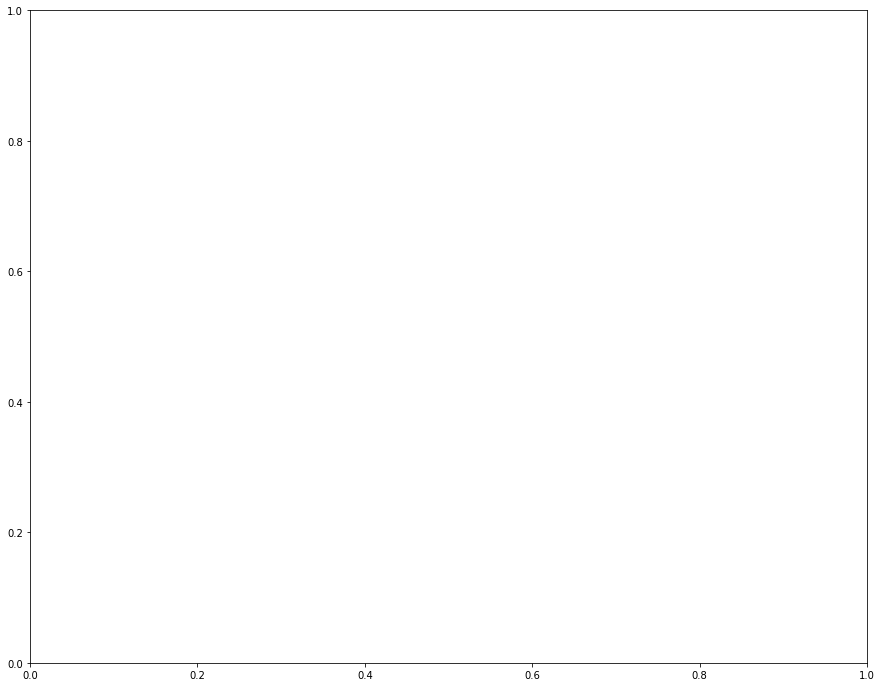

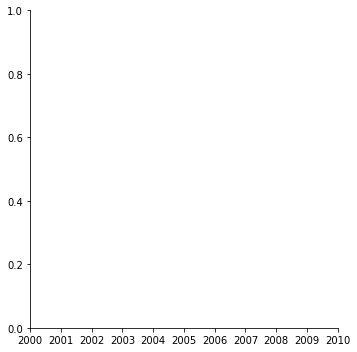

In [103]:
dates = plt.df.published
fig, ax = plt.subplots(figsize=(15,12))
fig = sns.lmplot(y="views", x="published_date", data=data, hue = 'num_speaker', fit_reg = False)
fig = fig.set_axis_labels('Time', 'Total Entries')

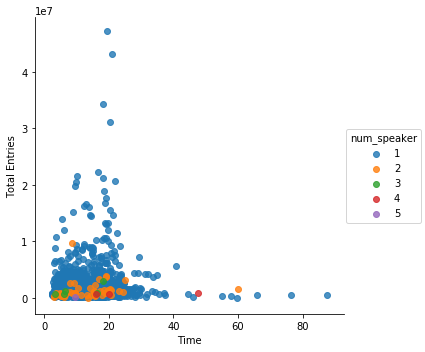

In [88]:
fig = sns.lmplot(y="views", x="duration", data=data, hue = 'num_speaker', fit_reg = False)
fig = fig.set_axis_labels('Time', 'Total Entries')

In [101]:
four_highest = data[data.views>30000000].ratings.index
four_highest[1] 

677